In [328]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df = pd.read_csv('trang.csv', encoding='latin-1', sep=';')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


- Chọn cột dữ liệu theo mã sinh viên
- 2151264688: cột 14,15

In [330]:
feats = ['1', '2', '3']


In [331]:
df[feats].head()


,1,2,3
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.0
4,1061.5,1061.5,1061.5


### 1. EDA dữ liệu

1.1. Kiểm tra dữ liệu thiếu

In [332]:
df[feats].isna().mean()

1    0.0
2    0.0
3    0.0
dtype: float64

- 2 cột đều không có dữ liệu thiếu

1.2. Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

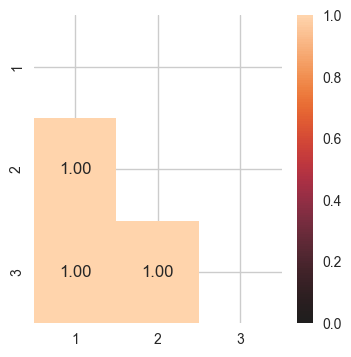

In [333]:
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f');

- Biểu đồ cho thấy 2 cột có độ tương quan dương và rất tương quan

1.3. Biểu đồ đường thể hiện dữ liệu qua thời gian

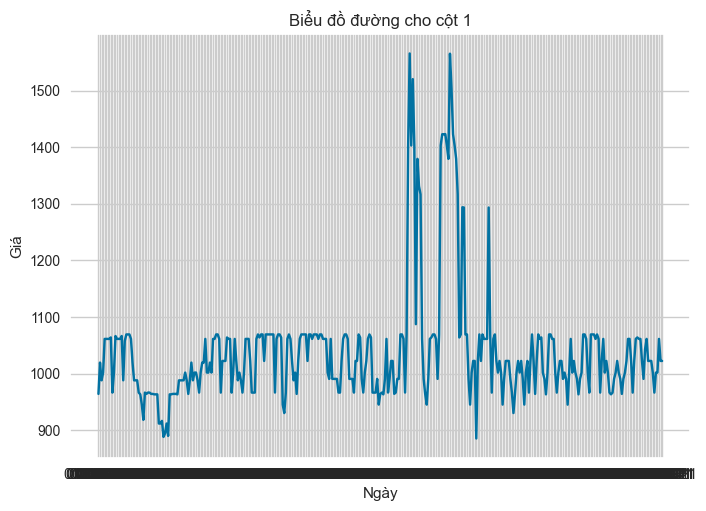

In [334]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

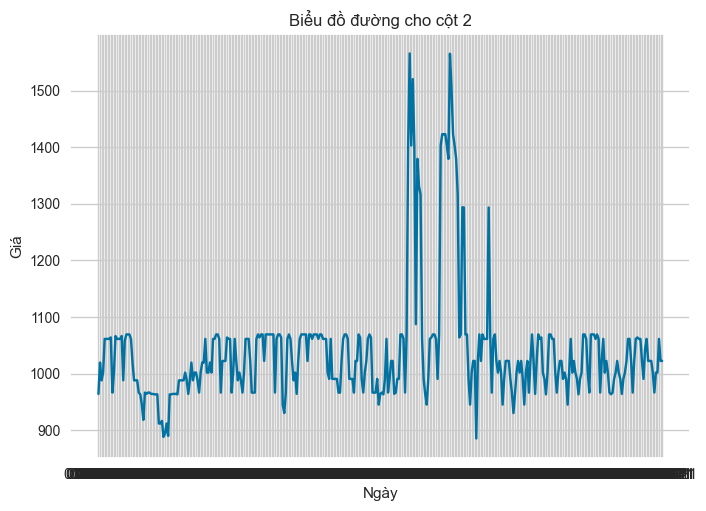

In [335]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

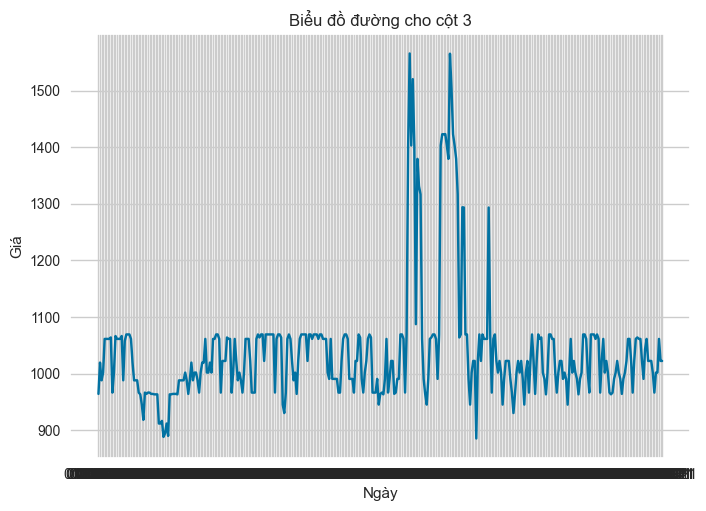

In [336]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

- Scale dữ liệu

In [337]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

- Dữ liệu sau khi scale

In [338]:
X[:5]

array([[-0.72216308, -0.72218675, -0.72216308],
       [-0.19550973, -0.19552756, -0.19550973],
       [-0.49359743, -0.49361856, -0.49359743],
       [-0.3640769 , -0.36409659, -0.3640769 ],
       [ 0.20257544,  0.20256203,  0.20257544]])

- Sử dụng phương pháp Elbow để xác định số cụm thông qua KMeans
- Chạy số cụm từ 3-12 xem số cụm nào có sự phân chia cụm có điểm số cao nhất

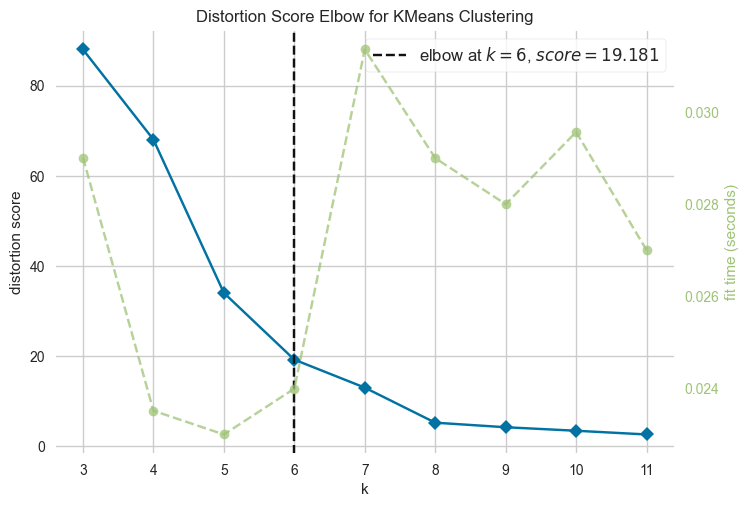

In [339]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

### 3. Sử dụng LSTM để dự đoán giá trị tương lai

In [340]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [341]:
feats = ['Ngày', '1', '2', '3']

In [342]:
df = df[feats]

In [343]:
df

,Ngày,1,2,3
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


- Chuyển format ngày

In [344]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

- Tạo số dữ liệu test bằng tháng 12

In [345]:
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

Biểu đồ thể hiện training và test trước khi dự đoán

- Biểu đồ thể hiện toàn bộ dữ liệu

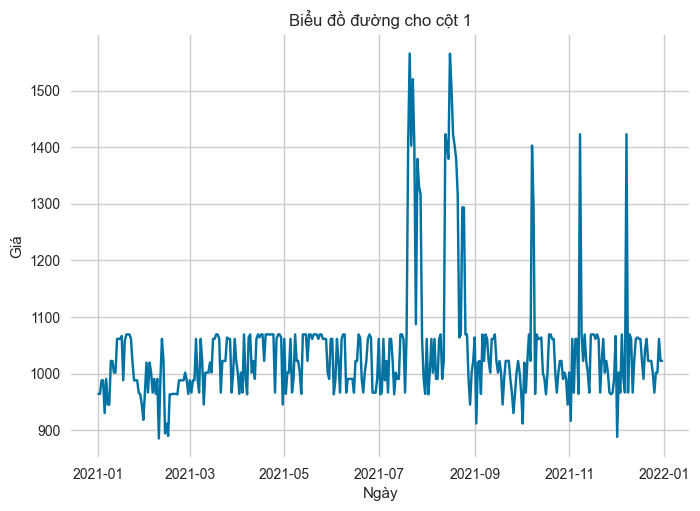

In [346]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

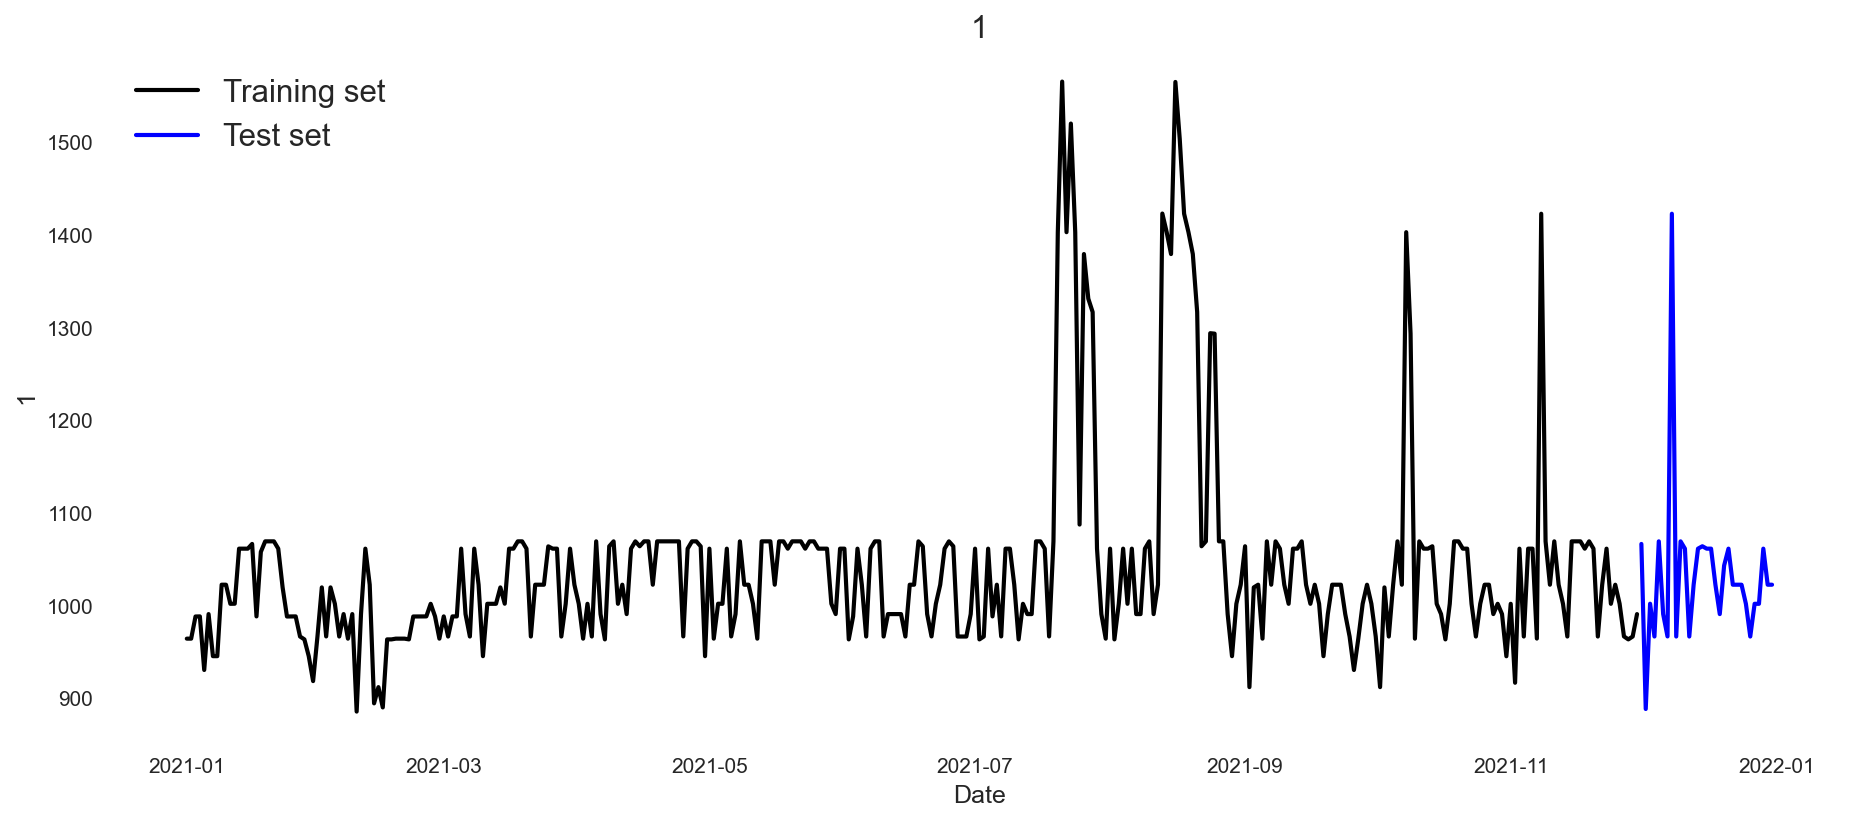

In [347]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['1'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['1'][-test_size:], color='blue', lw=2)
plt.title('1', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

- Sử dụng MinMaxScaler để đưa dữ liệu về khoảng 0-1

In [348]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['1']])

MinMaxScaler()

- Chọn window_size = 10 tức là 10 ngày dự đoán cho 1 ngày tiếp theo

In [349]:
window_size = 10

- Tạo tập training data

In [350]:
train_data = df[['1']][:-test_size]
train_data = scaler.transform(train_data)

In [351]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

- Tạo tập test data

In [352]:
test_data = df[['1']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [353]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

- Chuyển đổi dữ liệu từ dataframe, series sang numpy array

In [354]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [355]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [356]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (324, 10, 1)
y_train Shape:  (324, 1)
X_test Shape:   (31, 10, 1)
y_test Shape:   (31, 1)


- Khởi tạo model

In [357]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 128, return_sequences=False)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

- Tạo bộ siêu tham số: epochs=50 (lặp 50 lần)

In [358]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,721 (276.25 KB)

 Trainable params: 70,721 (276.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0643 - val_loss: 0.0396
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0568 - val_loss: 0.0156
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0216 - val_loss: 0.0166
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0202 - val_loss: 0.0182
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256 - val_loss: 0.0153
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0239 - val_loss: 0.0161
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0203 - val_loss: 0.0159
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - val_loss: 0.0155
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0238 - val_loss: 0.0157
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0237 - val_loss: 0.0154
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0193 - val_loss: 0.0163
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

- Dự đoán

In [359]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


In [360]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [361]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.017442772164940834
Test MAPE: 1.495546030642295


In [362]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

- Vẽ biểu đồ sau khi đã tự đoán

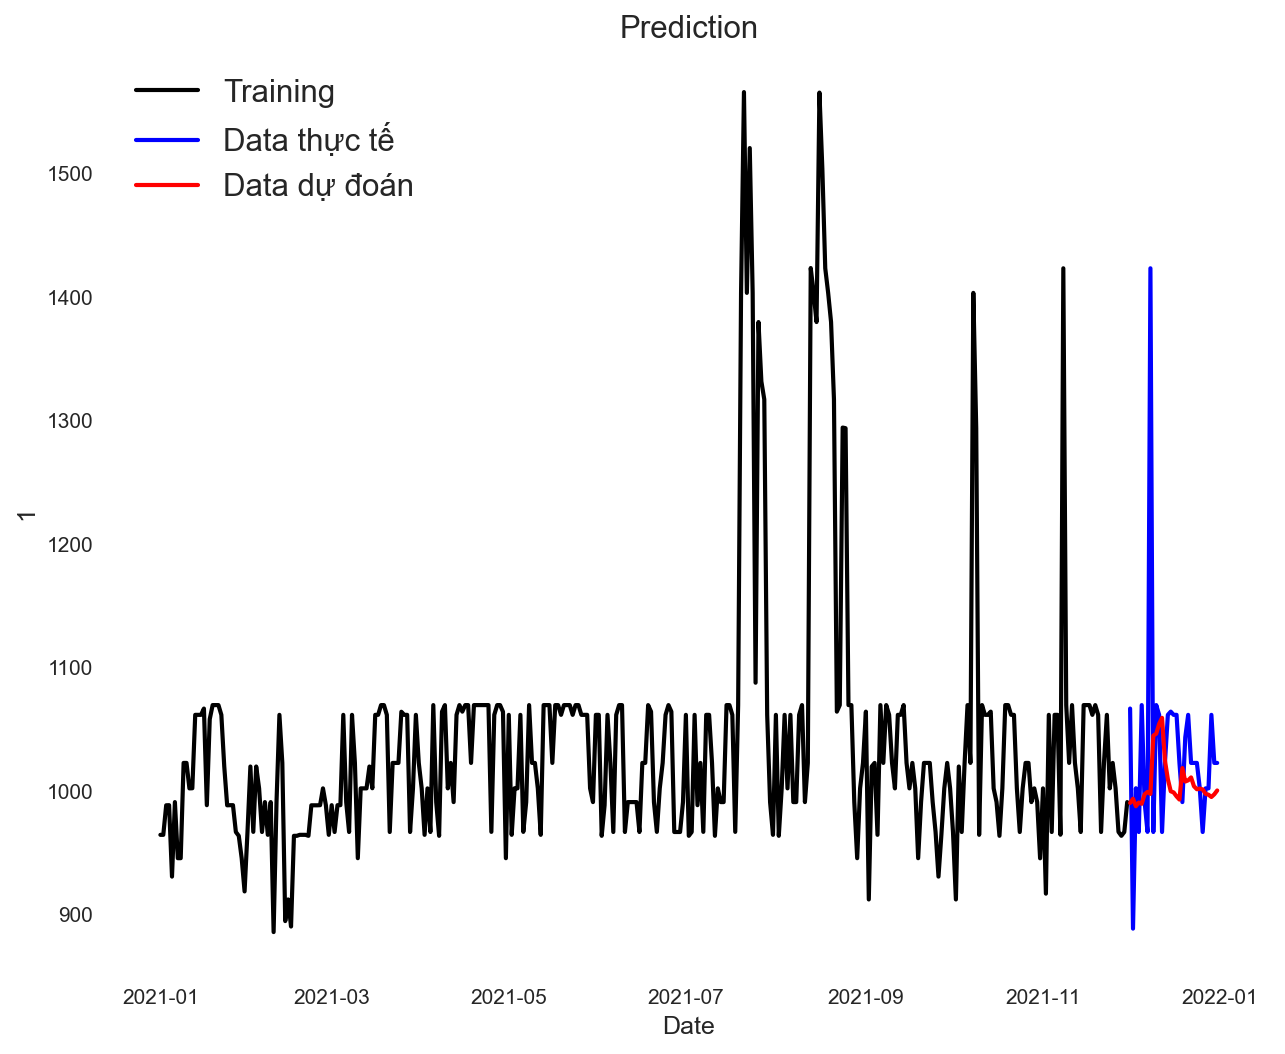

In [363]:
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

## LSTM Cột 2

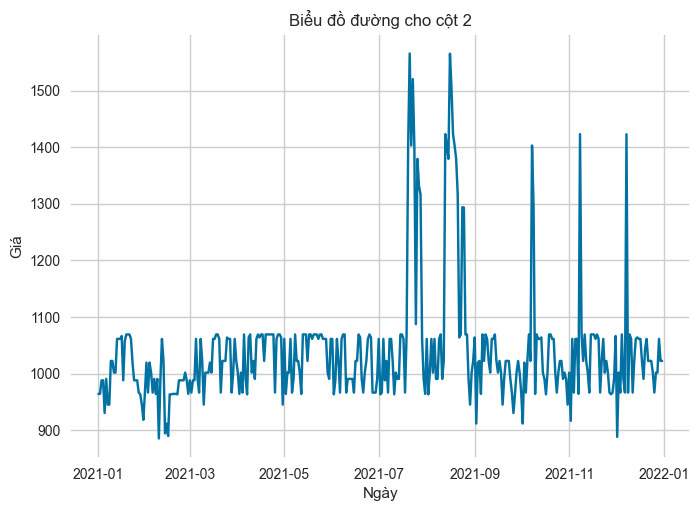

In [364]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

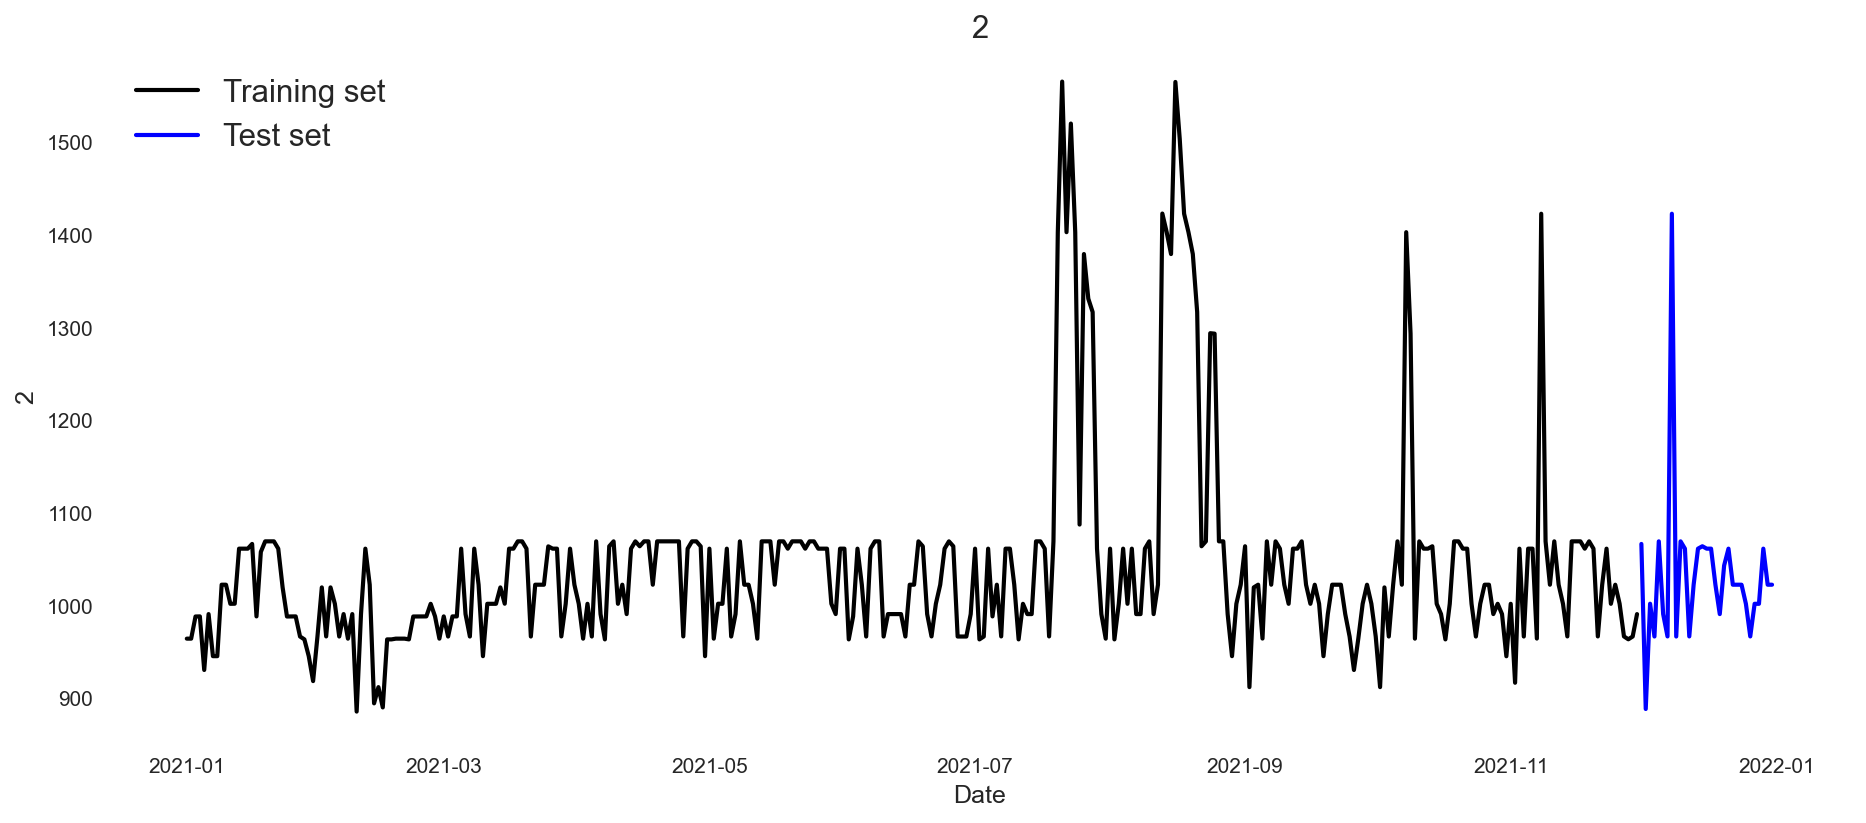

In [365]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['2'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['2'][-test_size:], color='blue', lw=2)
plt.title('2', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [366]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['2']])

MinMaxScaler()

In [367]:
window_size = 10

In [368]:
train_data = df[['2']][:-test_size]
train_data = scaler.transform(train_data)

In [369]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [370]:
test_data = df[['2']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [371]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [372]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [373]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [374]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (324, 10, 1)
y_train Shape:  (324, 1)
X_test Shape:   (31, 10, 1)
y_test Shape:   (31, 1)


In [375]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,721 (276.25 KB)

 Trainable params: 70,721 (276.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0622 - val_loss: 0.0312
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0451 - val_loss: 0.0212
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253 - val_loss: 0.0168
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - val_loss: 0.0153
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0163
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0215 - val_loss: 0.0159
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0254 - val_loss: 0.0157
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - val_loss: 0.0154
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - val_loss: 0.0186
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0277 - val_loss: 0.0153
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0259 - val_loss: 0.0157
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0259 

In [376]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0173
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


In [377]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.017341937869787216
Test MAPE: 1.7161925026322962


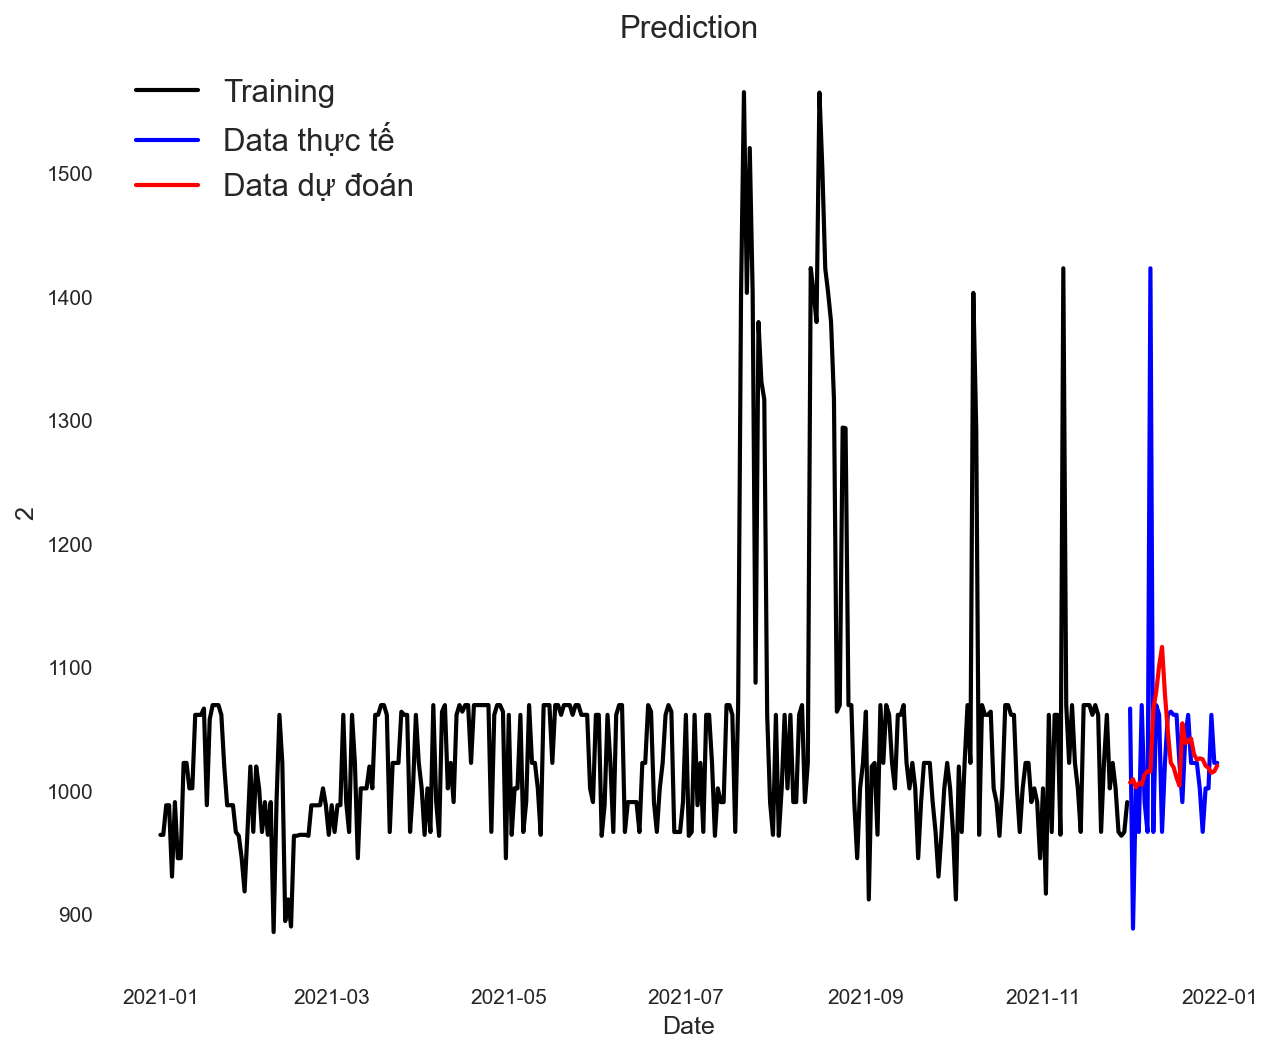

In [378]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

## LSTM Cột 3

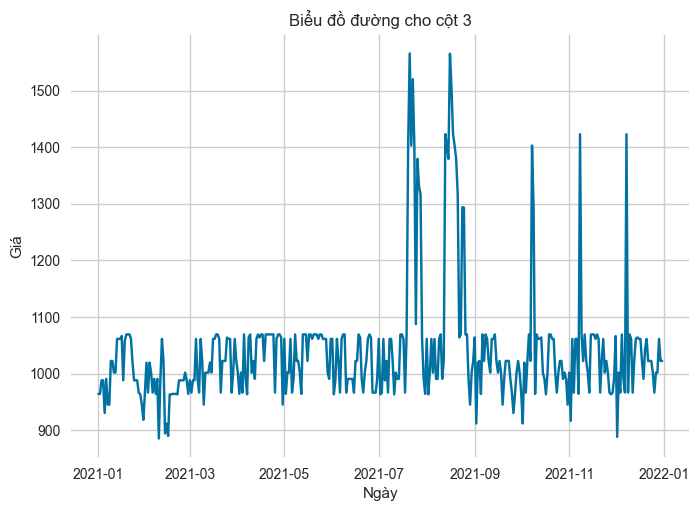

In [379]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

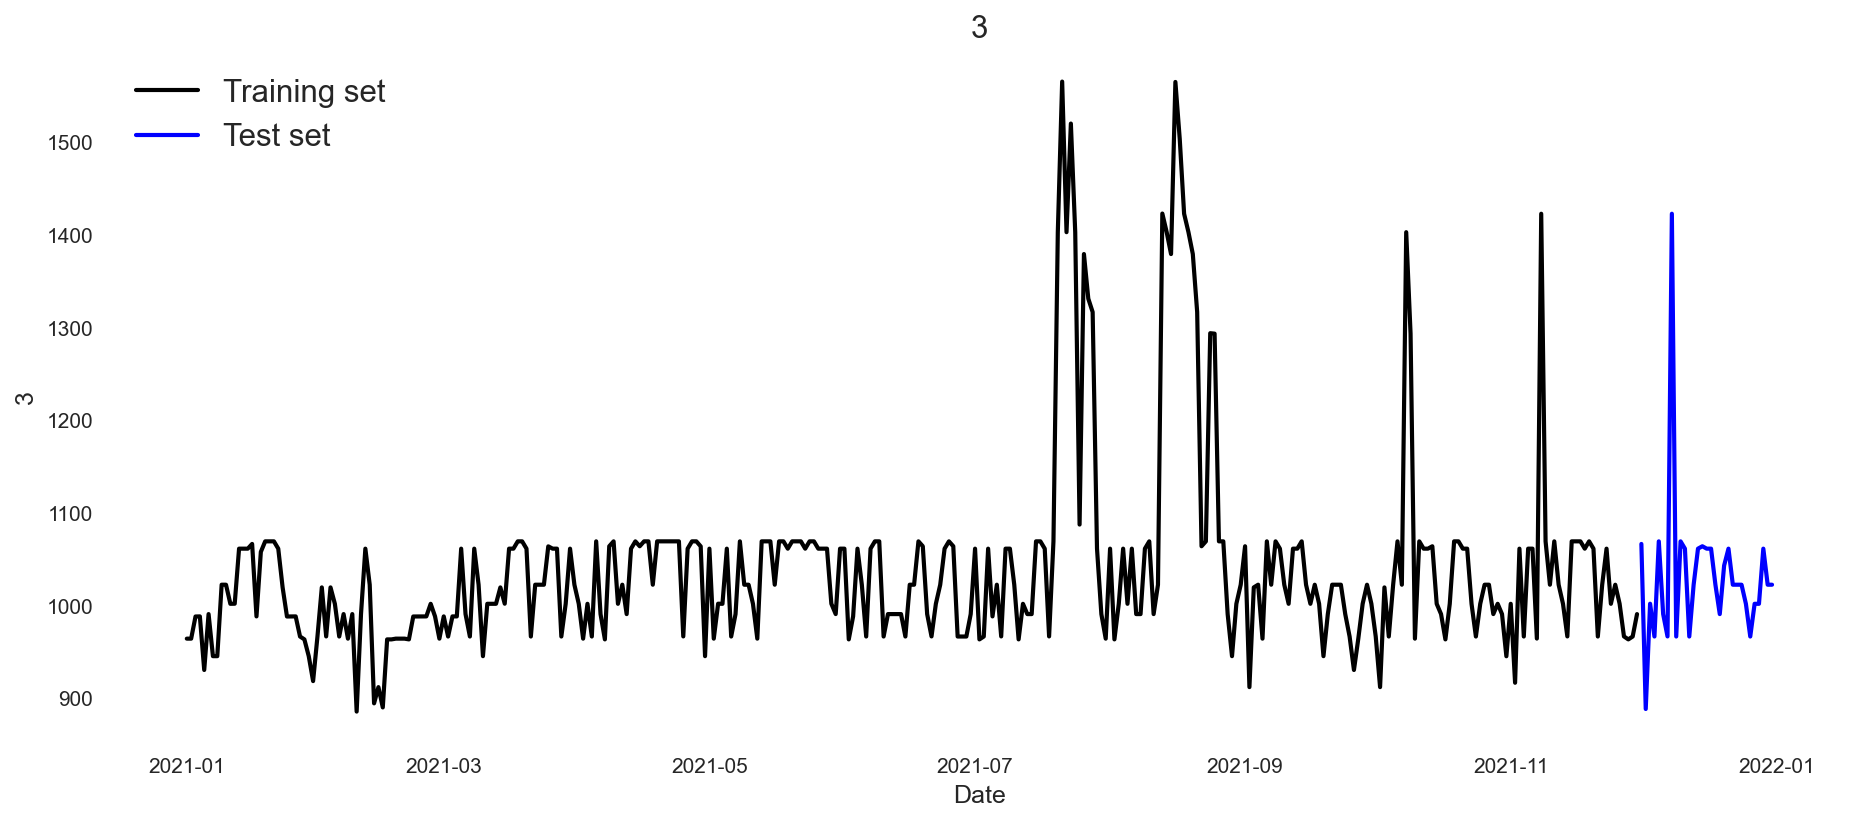

In [380]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['3'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['3'][-test_size:], color='blue', lw=2)
plt.title('3', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('3', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [381]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['3']])

MinMaxScaler()

In [382]:
window_size = 10

In [383]:
train_data = df[['3']][:-test_size]
train_data = scaler.transform(train_data)

In [384]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [385]:
test_data = df[['3']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [386]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [387]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [388]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [389]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,721 (276.25 KB)

 Trainable params: 70,721 (276.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0751 - val_loss: 0.0410
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0488 - val_loss: 0.0176
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0256 - val_loss: 0.0158
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0220 - val_loss: 0.0168
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0248 - val_loss: 0.0156
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0263 - val_loss: 0.0154
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0240 - val_loss: 0.0211
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0284 - val_loss: 0.0154
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0211 - val_loss: 0.0200
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0200 - val_loss: 0.0156
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0226 - val_loss: 0.0161
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

In [390]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


In [391]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [392]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.01771550439298153
Test MAPE: 1.6707906923502085


In [393]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

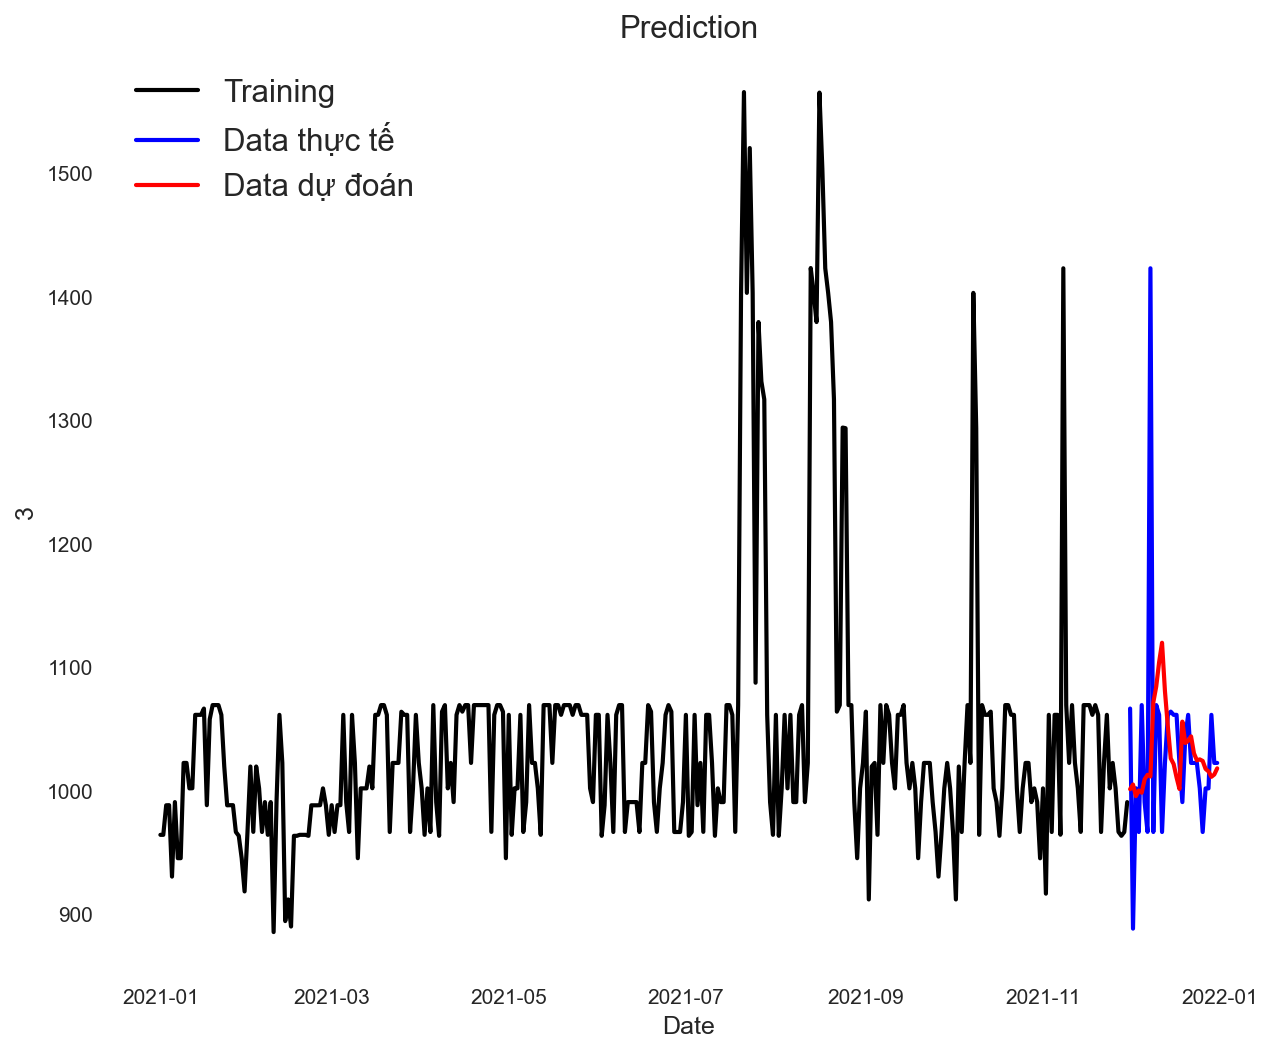

In [394]:
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('3', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [395]:
from pykalman import KalmanFilter

In [398]:
df = df[['1', '2', '3']]

   filtered_1  filtered_2  filtered_3
0  966.035079  966.035079  966.035079
1  969.305236  969.305236  969.305236
2  977.480630  977.480630  977.480630
3  974.836652  974.836652  974.836652
4  958.629328  958.629328  958.629328


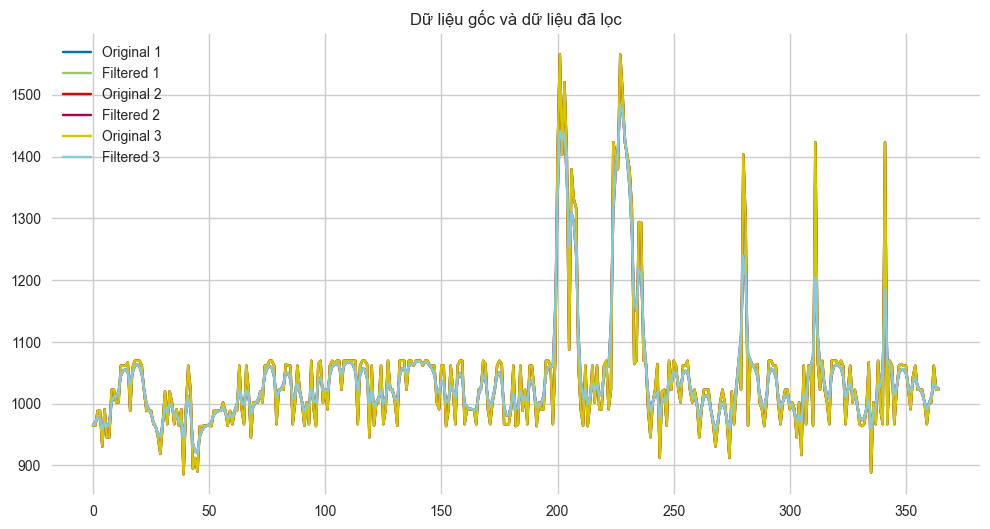

In [397]:
measurements = df.values
kf = KalmanFilter(initial_state_mean=measurements[0], n_dim_obs=measurements.shape[1])
state_means, state_covariances = kf.smooth(measurements)

filtered_data = pd.DataFrame(state_means, columns=[f'filtered_{i}' for i in range(1, measurements.shape[1] + 1)])
print(filtered_data.head())

plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns):
    plt.plot(df.index, df[column], label=f'Original {column}')
    plt.plot(df.index, filtered_data[f'filtered_{i+1}'], label=f'Filtered {column}')
plt.legend()
plt.title('Dữ liệu gốc và dữ liệu đã lọc')
plt.show()